In [1]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import torchvision
import torchvision.transforms as T
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from skimage import io, transform

In [2]:
dt = pd.read_csv('new_metadata_images_with_crop.csv', sep=',')

In [103]:
#Após balanceamento
Counter(dt['label_numeric'])

Counter({0: 31,
         1: 144,
         2: 98,
         3: 31,
         4: 62,
         5: 31,
         6: 31,
         7: 62,
         8: 31,
         9: 16,
         10: 31,
         11: 62,
         12: 31,
         13: 47,
         14: 124,
         15: 31,
         16: 31,
         17: 31,
         18: 211,
         19: 429,
         20: 111,
         21: 31,
         22: 124,
         23: 124,
         24: 217,
         25: 31})

In [4]:
#Serengethi Model
model_path = 'model.pth'

In [5]:
n = 0
train_l_sum = 0.0
train_acc_sum = 0.0

args = {
    'batch_size': 256,
    'num_workers': 4,
    'num_epochs': 50,
    'learning_rate': 0.001,
    'num_classes': 13,  # Number of KKCs.

}

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


def load_data():
    train_loader = DataLoader(dataset=train_dataset,
                              batch_size=args['batch_size'],
                              shuffle=True,
                              pin_memory=True,
                              num_workers=4)

    return train_loader


class AnimalImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_name = self.annotations['path'][index]
        image = io.imread(img_name)
        y_label = torch.tensor(self.annotations['label_numeric'][index])

        if self.transform:
            image = self.transform(image)

        return image, y_label

transform = T.Compose([
    T.ToPILImage(),
    T.ToTensor()
])

train_dataset = AnimalImageDataset(csv_file='new_metadata_images_with_crop.csv', root_dir='', transform=transform)

In [187]:
model = torch.load('model.pth')
model.to(device)
model.eval()

model = torch.nn.Sequential(*list(model.children())[:-1])

In [197]:
#Load model
model = torchvision.models.resnet18(pretrained=True)
model.to(device)
model.eval()
model = torch.nn.Sequential(*list(model.children())[:-1]) #Retirada da última camada para extrair as características da imagem

In [200]:
train = AnimalImageDataset(csv_file='new_metadata_images_with_crop.csv',
                           root_dir='',
                           transform=transform)

train_loader = DataLoader(dataset=train,
                          batch_size=args['batch_size'],
                          shuffle=False)


Extração de Características do Conjunto

# Modelo 

In [201]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

image_paths = dt['path']
new_features = []
image_tensor_array = []

for image_path in image_paths:
    image = Image.open(image_path)

    image_np = np.array(image)
    if len(image_np.shape) == 2:
        image = Image.fromarray(image_np)
        image = transform(image)
    else:
        image = transform(image)

    image_tensor = image.unsqueeze(0).to(device)
    image_tensor_array.append(image_tensor)

    features = model(image_tensor)
    features_cpu = features.squeeze().detach().cpu().numpy()

    new_features.append(features_cpu)

new_features = StandardScaler().fit_transform(new_features) #features extraidas das imagens do catálogo aumentadas

In [202]:
new_features.shape

(2203, 512)

In [203]:
# Crie as transformações para o pré-processamento
transform = transforms.Compose([
    T.ToPILImage(),
    transforms.Resize((224, 298)),
    transforms.ToTensor()
])

In [11]:
#Extract features
#model = torch.load('model.pth')
model = torch.nn.Sequential(*list(model.children())[:-1])
model.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [12]:
class_mapping = {
    'veado': 0,
    'rato': 1,
    'cuica': 2,
    'gamba': 3,
    'preguica': 4,
    'porco': 5,
    'cachorro': 6,
    'onça': 7,
    'gato': 8,
    'irara': 9,
    'quati': 10,
    'tatu': 11,
    'anta': 12,
    'tamandua': 13,
    'macaco': 14,
    'cutia': 15,
    'capivara': 16,
    'gaviao': 17,
    'ave': 18,
    'sapo': 19,
    'cobra': 20,
    'lagarto': 21,
    'jacare': 22,
    'jabuti': 23,
    'calango': 24,
    'iguana': 25
}

In [205]:
transform = transforms.Compose([
    T.ToPILImage(),
    transforms.Resize((224, 298)),
    transforms.RandomCrop((50, 50)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

dataset = AnimalImageDataset(csv_file='new_metadata_images_with_crop.csv',
                             root_dir='',
                             transform=transform)
features = []
labels = []
for i in range(len(dataset)):
    image, label_numeric = dataset[i]
    features.append(image)
    labels.append(label_numeric)

X_train, X_test, y_train, y_test = train_test_split(new_features, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)
accuracy = svm_classifier.score(X_test, y_test)
accuracy

(1762, 512) (441, 512)


0.9297052154195011

Matriz de Confusão

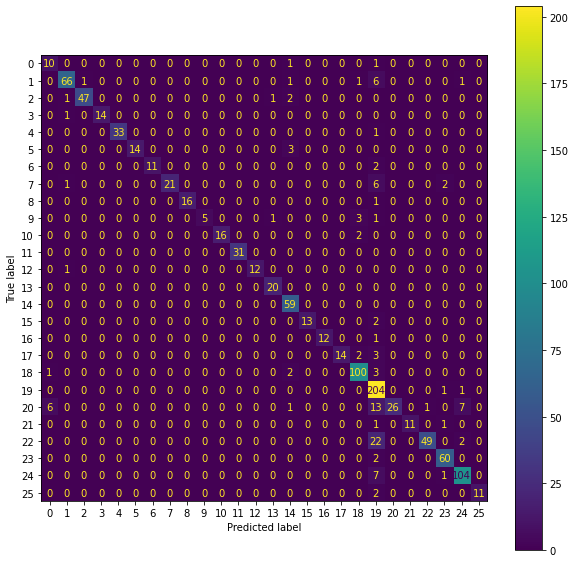

In [156]:
fig, ax = plt.subplots(figsize=(10, 10))
cm_display = ConfusionMatrixDisplay(confusion_matrix)
cm_display.plot(ax=ax)
plt.show()

Validação dos Dados

In [195]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop((50, 50)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

image_path = 'IMAGENS_ANOTADAS_2/imagem121.png'

image = Image.open(image_path)
image_np = np.array(image)

if len(image_np.shape) == 2:
    image = Image.fromarray(image_np)
    image = transform(image)
else:
    image = transform(image)

image_tensor = image.unsqueeze(0).to(device)

feature = model(image_tensor)
feature_cpu = feature.squeeze().detach().cpu().numpy()
#feature_cpu = np.transpose(feature_cpu, (1, 2, 0))



n_feat = StandardScaler().fit_transform(feature_cpu.reshape(-1,1))  # Normalização das características

predicted_class = svm_classifier.predict(n_feat.transpose())


predicted_class #classe 